In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from PIL import Image
from hashlib import sha256
import time

from glob import glob

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


In [2]:
# Reading the data from HAM_metadata.csv
df = pd.read_csv('../raw_data/HAM10000_metadata.csv')
base_skin_dir = os.path.join('..','raw_data')
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir,'**', '*.jpg'),recursive=True)}
df['path'] = df['image_id'].map(imageid_path_dict.get)

df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  
0  ../raw_data/HAM10000_images_part_1/ISIC_002741...  
1  ../raw_data/HAM10000_images_part_1/ISIC_002503...  
2  ../raw_data/HAM10000_images_part_1/ISIC_002676...  
3  ../raw_data/HAM10000_images_part_1/ISIC_002566...  
4  ../raw_data/HAM10000_images_part_2/ISIC_003163...

<class 'numpy.ndarray'>


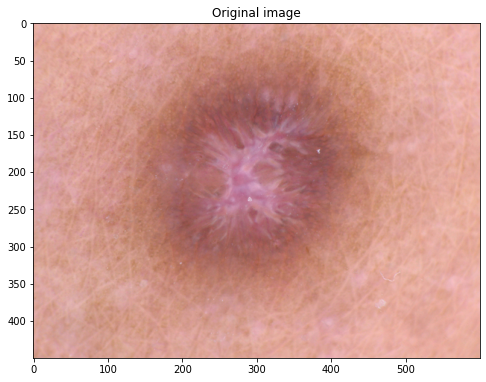

In [3]:
img = base_skin_dir + '/HAM10000_images_part_1/ISIC_0024318.jpg'
img_ker = load_img(img)
img_np = img_to_array(img_ker)
samples = np.expand_dims(img_np, 0)
plt.figure(figsize=(8,8))
plt.imshow(img_ker)
plt.title("Original image");

#print(img_np)
print(type(img_np))

im = Image.fromarray(img_np.astype('uint8'))
im.save("ISIC_0024318_orig.jpg")

#print(np.max(img_np))
#img_np.astype('uint8')

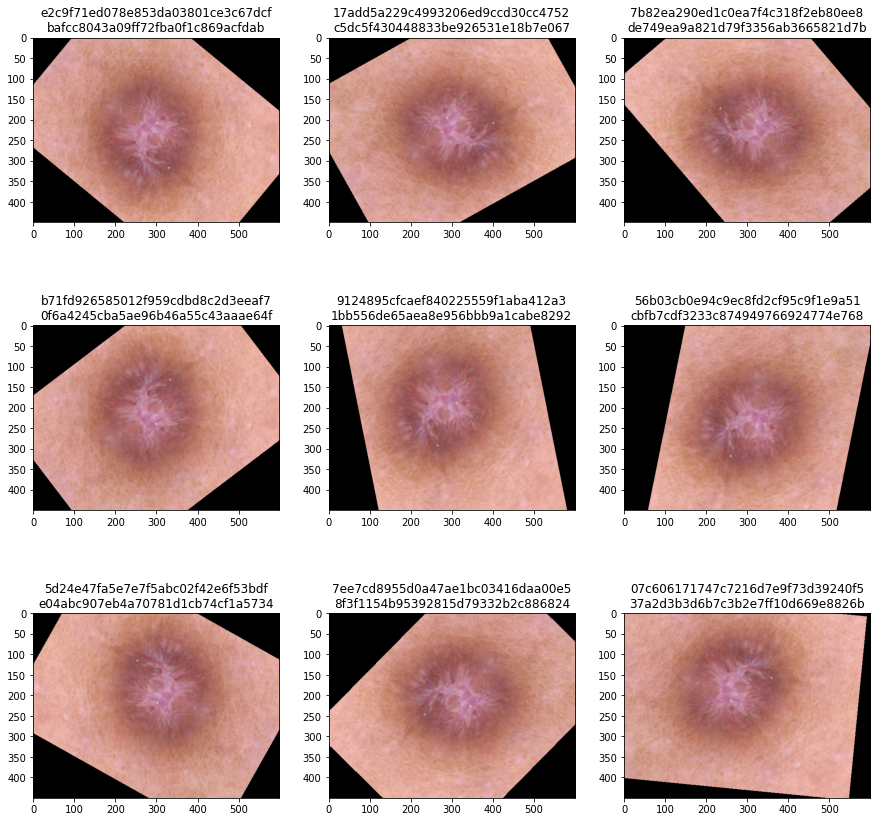

In [9]:
# Testing Random image transformations
datagen = ImageDataGenerator(
                            rotation_range=90, 
                            horizontal_flip=True,
                            vertical_flip=True,
                            #featurewise_std_normalization=True,
                            #channel_shift_range=1.0,
                            #zoom_range=0.1,
                            #zca_whitening=True,
                            shear_range=0.0,
                            fill_mode = 'constant',# 'nearest', #'wrap', 'reflect', 'constant'
                            width_shift_range = [0, 0.05],#, 100, 200, 300, 400],
                            height_shift_range = [0, 0.05],#, 100, 200, 300, 400],
)

it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize=(15,15))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    bytes_img = image.tobytes() # read entire np as bytes
    readable_hash = str(sha256(bytes_img).hexdigest());
    plt.title(readable_hash[0:32] + '\n' + readable_hash[32:])
    plt.imshow(image)
# show the figure
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


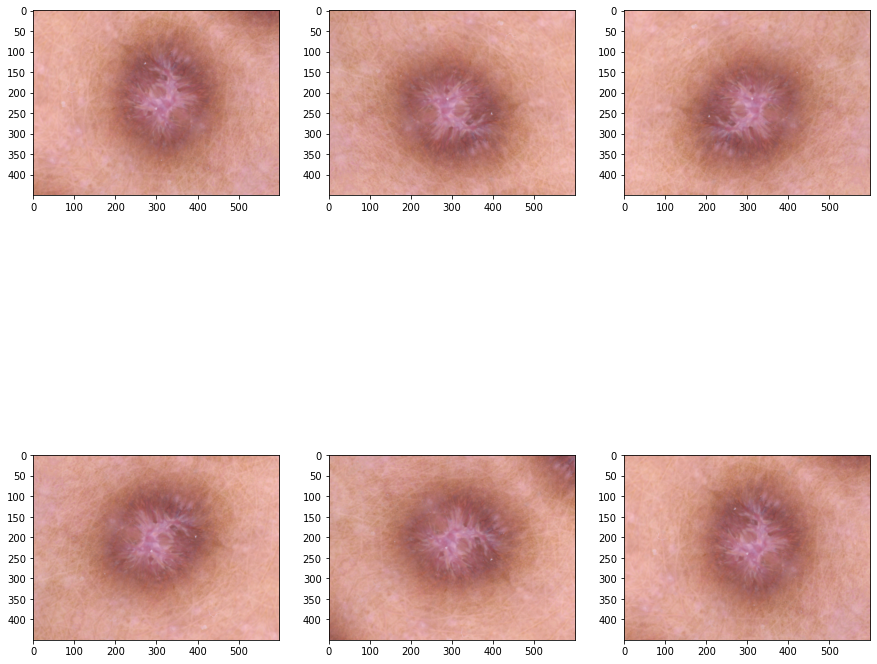

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
img_np_tf = tf.cast(tf.expand_dims(img_np, 0), tf.uint8)
plt.figure(figsize=(15, 15))
for i in range(6):
    augmented_image = data_augmentation(img_np_tf)
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(np.array(augmented_image[0]))
    plt.axis("on")
    print(type(np.array(data_augmentation(img_np))[0]))

#plt.imshow(data_augmentation(img_np)[0])



In [21]:
#hashing the image

import hashlib
filename = img
with open(filename,"rb") as f:
    bytes = f.read() # read entire file as bytes
    readable_hash = str(hashlib.sha256(bytes).hexdigest());
    print(readable_hash)
    print(readable_hash[0:32])
    print(readable_hash[32:])

5385558c6c44a27dca3f12f33a7d982d577b07631ab0dfbe642f6f829cdfdf3b
5385558c6c44a27dca3f12f33a7d982d
577b07631ab0dfbe642f6f829cdfdf3b


In [22]:
#hashing the numpy array of the image (image -> numpy -> bytes -> hash)
bytes = img_np.tobytes() # read entire np as bytes
readable_hash = hashlib.sha256(bytes).hexdigest();
print(readable_hash)

c33fc9066bdaed19b2758085576f58c7be36b2afd152e7af31d03cf74c6cde67


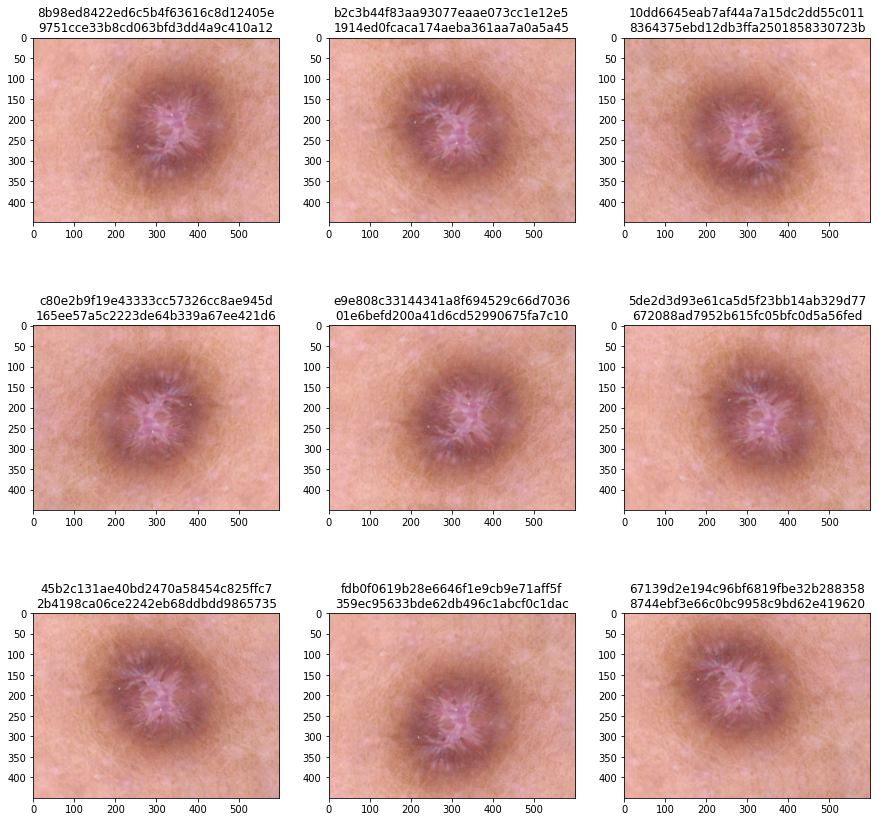

In [23]:
#Random image transformations
datagen = ImageDataGenerator(
                            rotation_range=15, 
                            horizontal_flip=True,
                            vertical_flip=True,
                            #featurewise_std_normalization=True,
                            #channel_shift_range=1.0,
                            #zoom_range=[0.8, 1],
                            #zca_whitening=True,
                            shear_range=0.0,
                            fill_mode = 'reflect',# 'nearest', #'wrap', 'reflect', 'constant'
                            width_shift_range = [0, 0.05],#, 100, 200, 300, 400],
                            height_shift_range = [0, 0.05],#, 100, 200, 300, 400],
)

it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize=(15,15))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    bytes_img = image.tobytes() # read entire np as bytes
    readable_hash = str(hashlib.sha256(bytes_img).hexdigest());
    plt.title(readable_hash[0:32] + '\n' + readable_hash[32:])
# show the figure
plt.show()

In [24]:
def augment_data(subset_df, N, output_dir="augment_"+str(int(1000*time.time()))+"/", datagen=ImageDataGenerator(
                            rotation_range=15, 
                            horizontal_flip=True,
                            vertical_flip=True,
                            #featurewise_std_normalization=True,
                            #channel_shift_range=1.0,
                            #zoom_range=[0.8, 1],
                            #zca_whitening=True,
                            shear_range=0.0,
                            fill_mode = 'reflect',# 'nearest', #'wrap', 'reflect', 'constant'
                            width_shift_range = [0, 0.05],#, 100, 200, 300, 400],
                            height_shift_range = [0, 0.05],#, 100, 200, 300, 400],
                    )
                ):
    df_size = len(subset_df)
    os.mkdir(output_dir)
    
    # downsampling data
    #im = Image.fromarray(img_np.astype('uint8'))
    #im.save(os.path.join("./", output_dir, "ISIC_0024318_orig_.jpg"))
    if N <= len(subset_df):
        return subset_df.sample(N)
    
    # data augmentation
    for i in range(0, N-len(subset_df)):
        print(i)
        index = i % len(subset_df)
        row = subset_df.iloc[index]
        img_ker = load_img(subset_df.iloc[index]['path'])
        img_np = img_to_array(img_ker)
        samples = np.expand_dims(img_np, 0)

        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        plt.figure(figsize=(8,8))
        #for j in range(9):
        # define subplot
        #plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        bytes_img = image.tobytes() # read entire np as bytes
        readable_hash = str(hashlib.sha256(bytes_img).hexdigest());
        plt.title(readable_hash[0:32] + '\n' + readable_hash[32:])
        plt.imshow(image)
    # show the figure
        #plt.show()


0
1
2
3
4
5
6
7


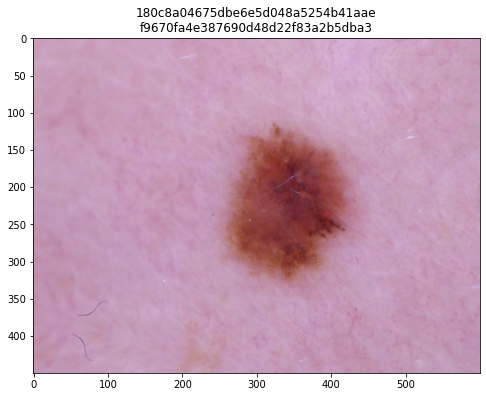

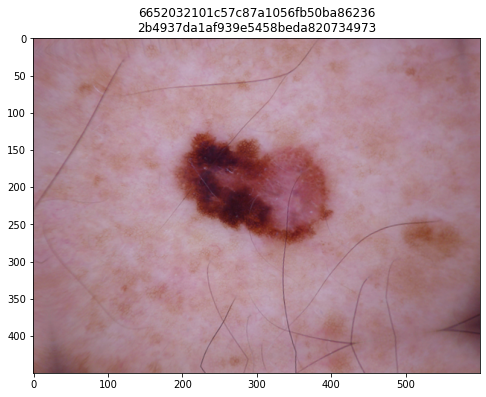

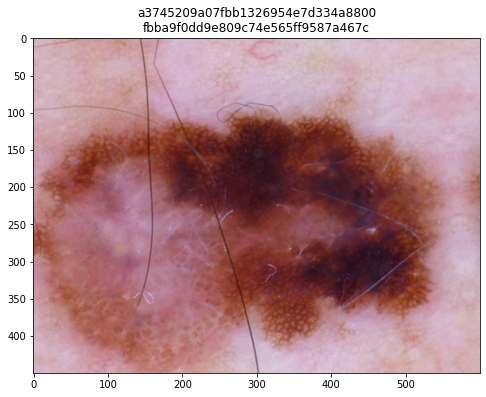

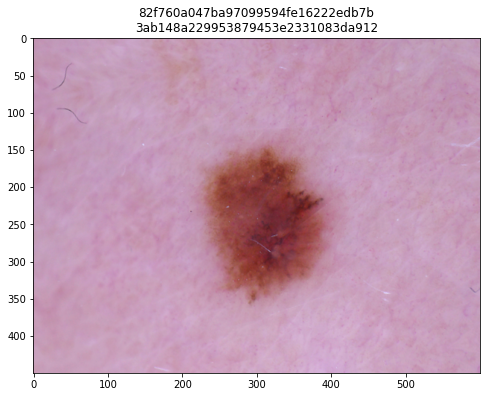

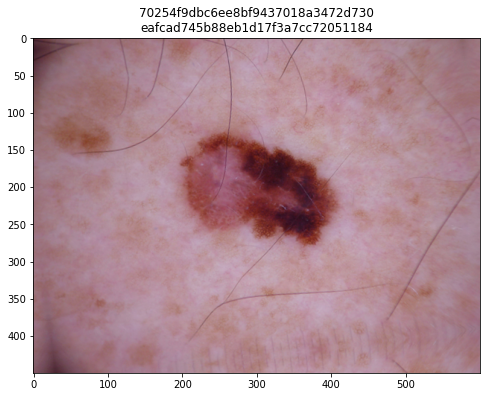

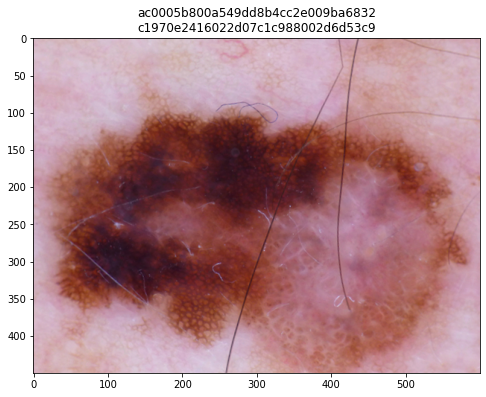

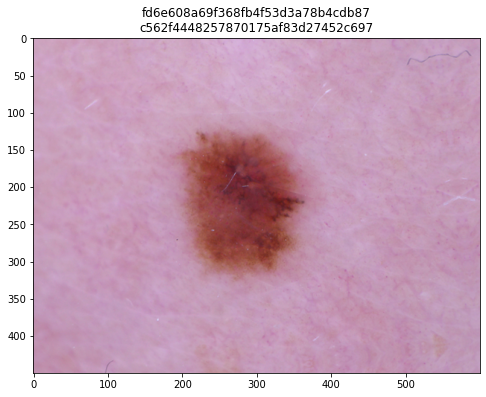

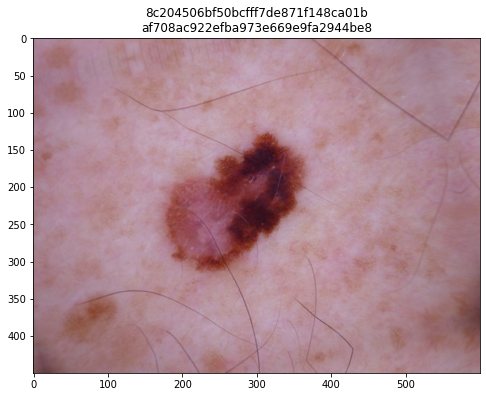

In [25]:
augment_data(df[df['dx']=='mel'][117:120], 11, output_dir="augment_"+str(int(1000*time.time()))+"/")

In [26]:
df[df['dx']=='mel'][117:120]

lesion_id      image_id   dx dx_type   age     sex     localization  \
1328  HAM_0002838  ISIC_0030818  mel   histo  65.0  female  lower extremity   
1329  HAM_0003990  ISIC_0026360  mel   histo  60.0    male             back   
1330  HAM_0003990  ISIC_0025996  mel   histo  60.0    male             back   

                                                   path  
1328  ../raw_data/HAM10000_images_part_2/ISIC_003081...  
1329  ../raw_data/HAM10000_images_part_1/ISIC_002636...  
1330  ../raw_data/HAM10000_images_part_1/ISIC_002599...

In [27]:
!ls ../

app.py	 config    MANIFEST.in	raw_data   requirements.txt  setup.py	tests
cheetah  Makefile  notebooks	README.md  scripts	     test_data


In [28]:
!ls
!rm -R augment_*
!ls

abdielrt_baseline_model.ipynb
augment_1655553077297
Case_1_Convolutional_Neural_Network_for_skin_lesion_classification_understanding_the_fundamentals_through_hands_on_learning.ipynb
data-augmentation-random-transformations-dncampo.ipynb
HAM10000_second_EDA_01.ipynb
ISIC_0024318_orig.jpg
ISIC_2019
models_and_metadata_isic_images
Toy_img
usage_isic_api.ipynb
abdielrt_baseline_model.ipynb
Case_1_Convolutional_Neural_Network_for_skin_lesion_classification_understanding_the_fundamentals_through_hands_on_learning.ipynb
data-augmentation-random-transformations-dncampo.ipynb
HAM10000_second_EDA_01.ipynb
ISIC_0024318_orig.jpg
ISIC_2019
models_and_metadata_isic_images
Toy_img
usage_isic_api.ipynb
